In [1]:
import pandas as pd

In [39]:
df=pd.read_csv('data/flight_price.csv')

In [40]:
def preprocessing(df):
    #Encode the ordinal variables "stops" and "class".
    df["stops"] = df["stops"].replace({'zero':0,'one':1,'two_or_more':2}).astype(int)
    df["class"] = df["class"].replace({'Economy':0,'Business':1}).astype(int)
    
    #Create the dummy variables for the cities, the times and the airlines.
    dummies_variables = ["airline","source_city","destination_city","departure_time","arrival_time"]
    dummies = pd.get_dummies(df[dummies_variables], drop_first= True)
    df = pd.concat([df,dummies],axis=1)
    
    #Create the dummy variables for the cities, the times and the airlines.
    df = df.drop(["flight","airline","source_city","destination_city","departure_time","arrival_time"],axis=1)
    
    return df

In [41]:
newdf=preprocessing(df)

C:\Users\sutan\AppData\Local\Temp\ipykernel_9956\1117142630.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["stops"] = df["stops"].replace({'zero':0,'one':1,'two_or_more':2}).astype(int)
C:\Users\sutan\AppData\Local\Temp\ipykernel_9956\1117142630.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["class"] = df["class"].replace({'Economy':0,'Business':1}).astype(int)


In [18]:
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [8]:
df.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

In [9]:
df.shape

(300153, 12)

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,300153.0,150076.000000,86646.852011,0.00,75038.00,150076.00,225114.00,300152.00
duration,300153.0,12.221021,7.191997,0.83,6.83,11.25,16.17,49.83
days_left,300153.0,26.004751,13.561004,1.00,15.00,26.00,38.00,49.00
price,300153.0,20889.660523,22697.767366,1105.00,4783.00,7425.00,42521.00,123071.00


In [17]:
df.isnull().sum()

airline             0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [16]:
df.drop(columns=['Unnamed: 0','flight'],inplace=True)

In [20]:
numerical_columns = df.columns[df.dtypes != "object"]
categorical_columns = df.columns[df.dtypes == 'object']
print("Numerical Columns:", numerical_columns)
print("Categorical Columns:", categorical_columns)

Numerical Columns: Index(['duration', 'days_left', 'price'], dtype='object')
Categorical Columns: Index(['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
       'destination_city', 'class'],
      dtype='object')


In [21]:
df[categorical_columns].describe()


,airline,source_city,departure_time,stops,arrival_time,destination_city,class
count,300153,300153,300153,300153,300153,300153,300153
unique,6,6,6,3,6,6,2
top,Vistara,Delhi,Morning,one,Night,Mumbai,Economy
freq,127859,61343,71146,250863,91538,59097,206666


In [22]:
df.columns

Index(['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
       'destination_city', 'class', 'duration', 'days_left', 'price'],
      dtype='object')

In [23]:
numerical_columns

Index(['duration', 'days_left', 'price'], dtype='object')

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

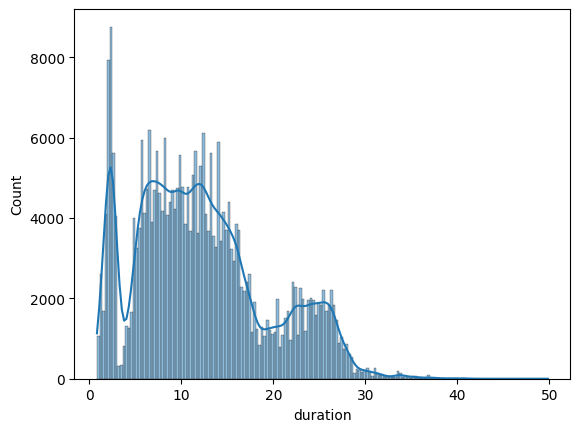

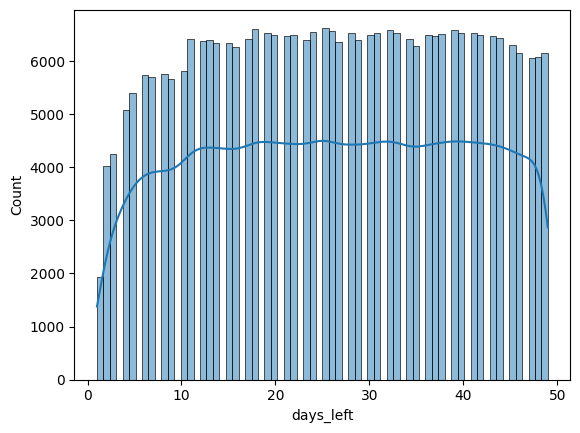

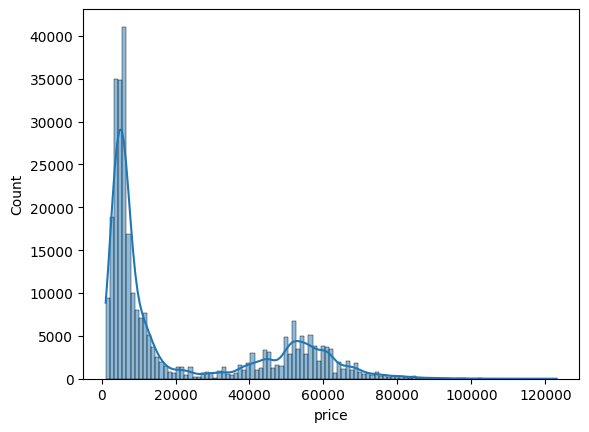

In [25]:
x=1
for i in numerical_columns:
    sns.histplot(data=df,x=i,kde=True)
    print("\n")
    plt.show()

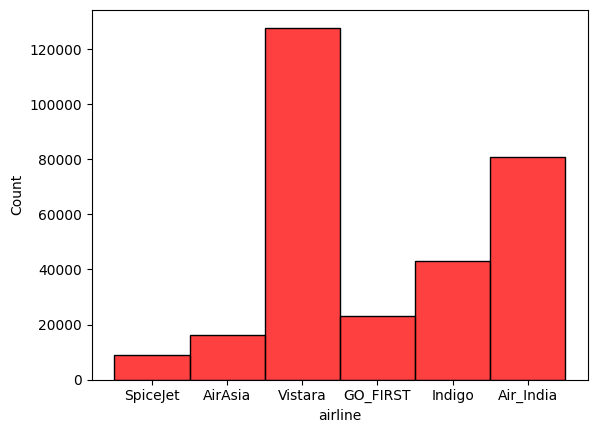

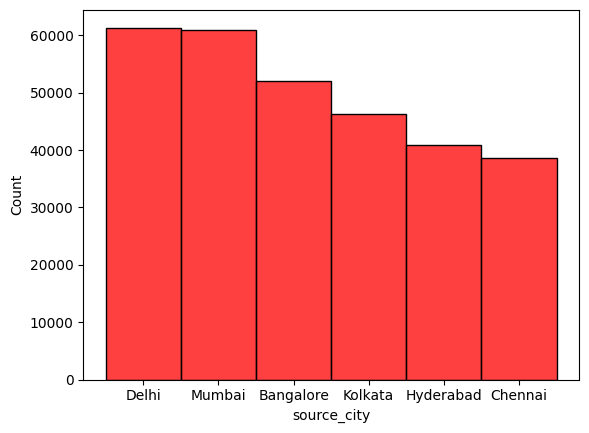

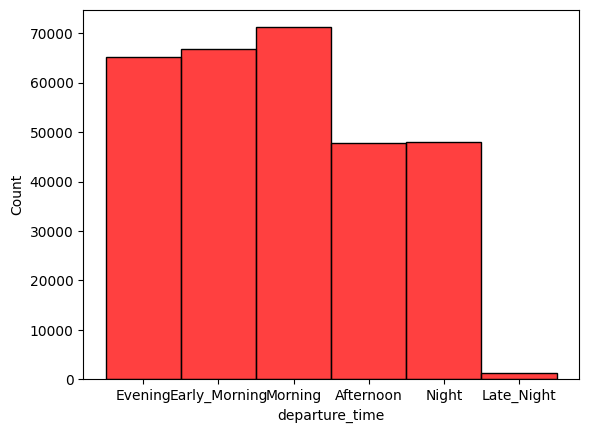

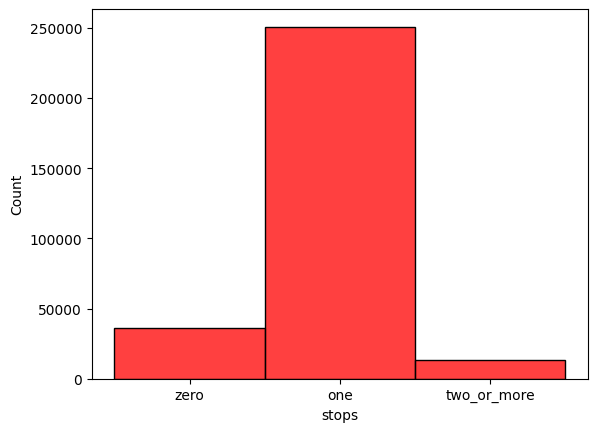

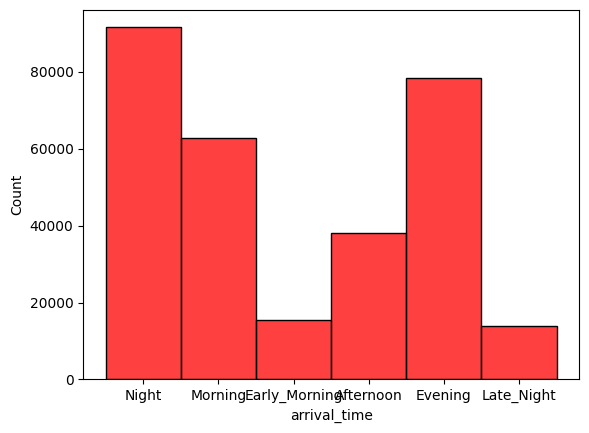

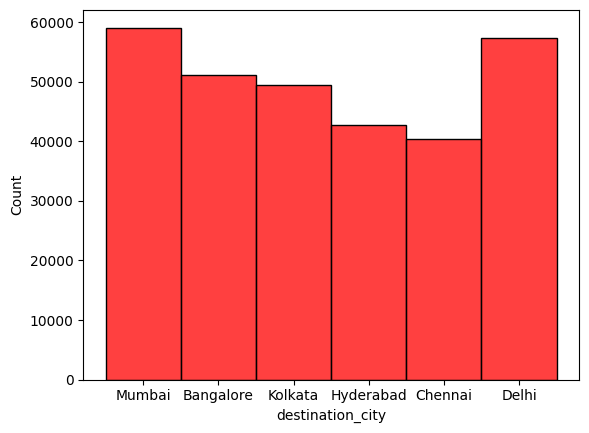

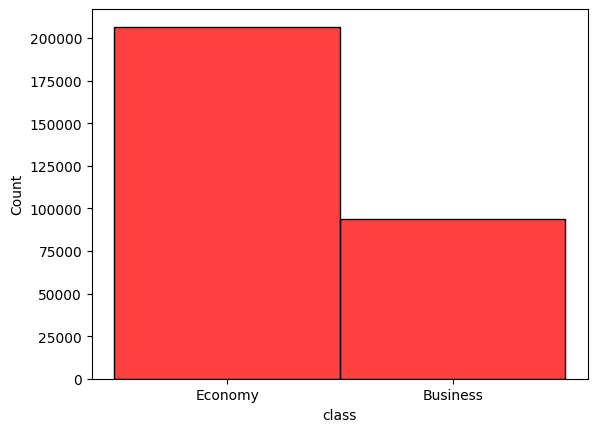

In [26]:
x = 1 
for i in categorical_columns: 
    sns.histplot(data = df, x = i, color= "Red")
    print("\n")
    plt.show()

<Axes: >

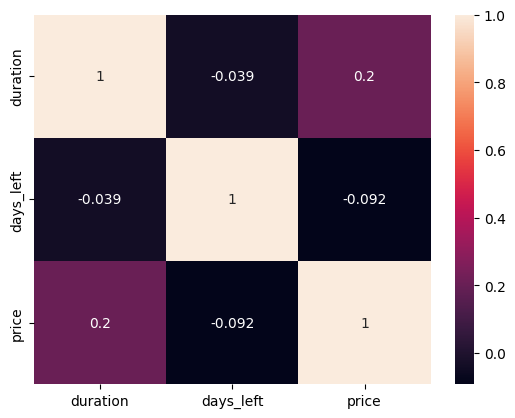

In [27]:
sns.heatmap(df[numerical_columns].corr(),annot=True)


<Axes: xlabel='price'>

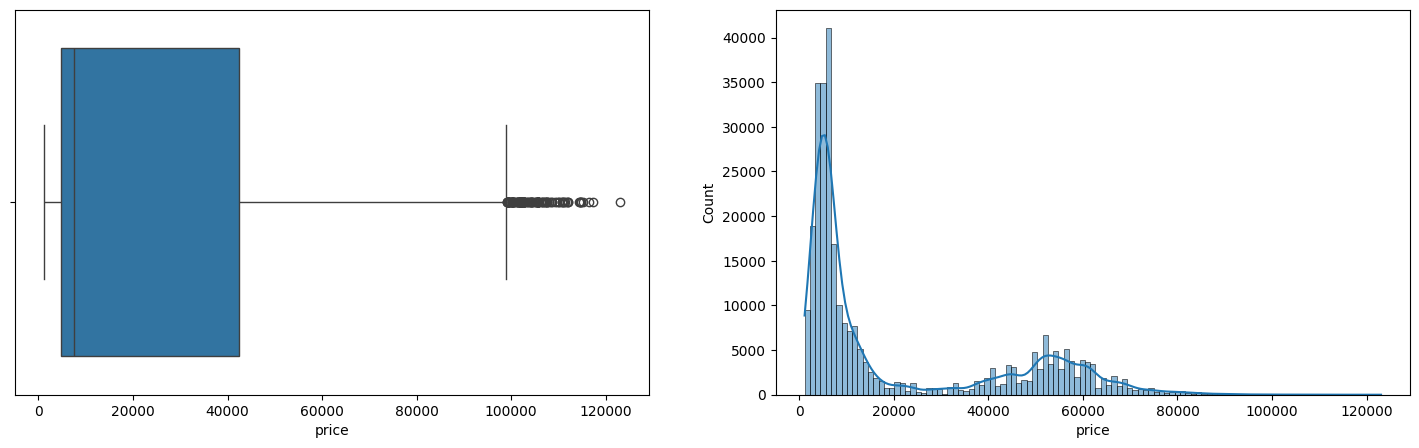

In [29]:
plt.figure(figsize = (18,5))
plt.subplot(1,2,2)
sns.histplot(x = 'price', data = df, kde = True)
plt.subplot(1,2,1)
sns.boxplot(x = 'price', data = df)

Text(0.5, 1.0, 'Airline prices based on the class and company')

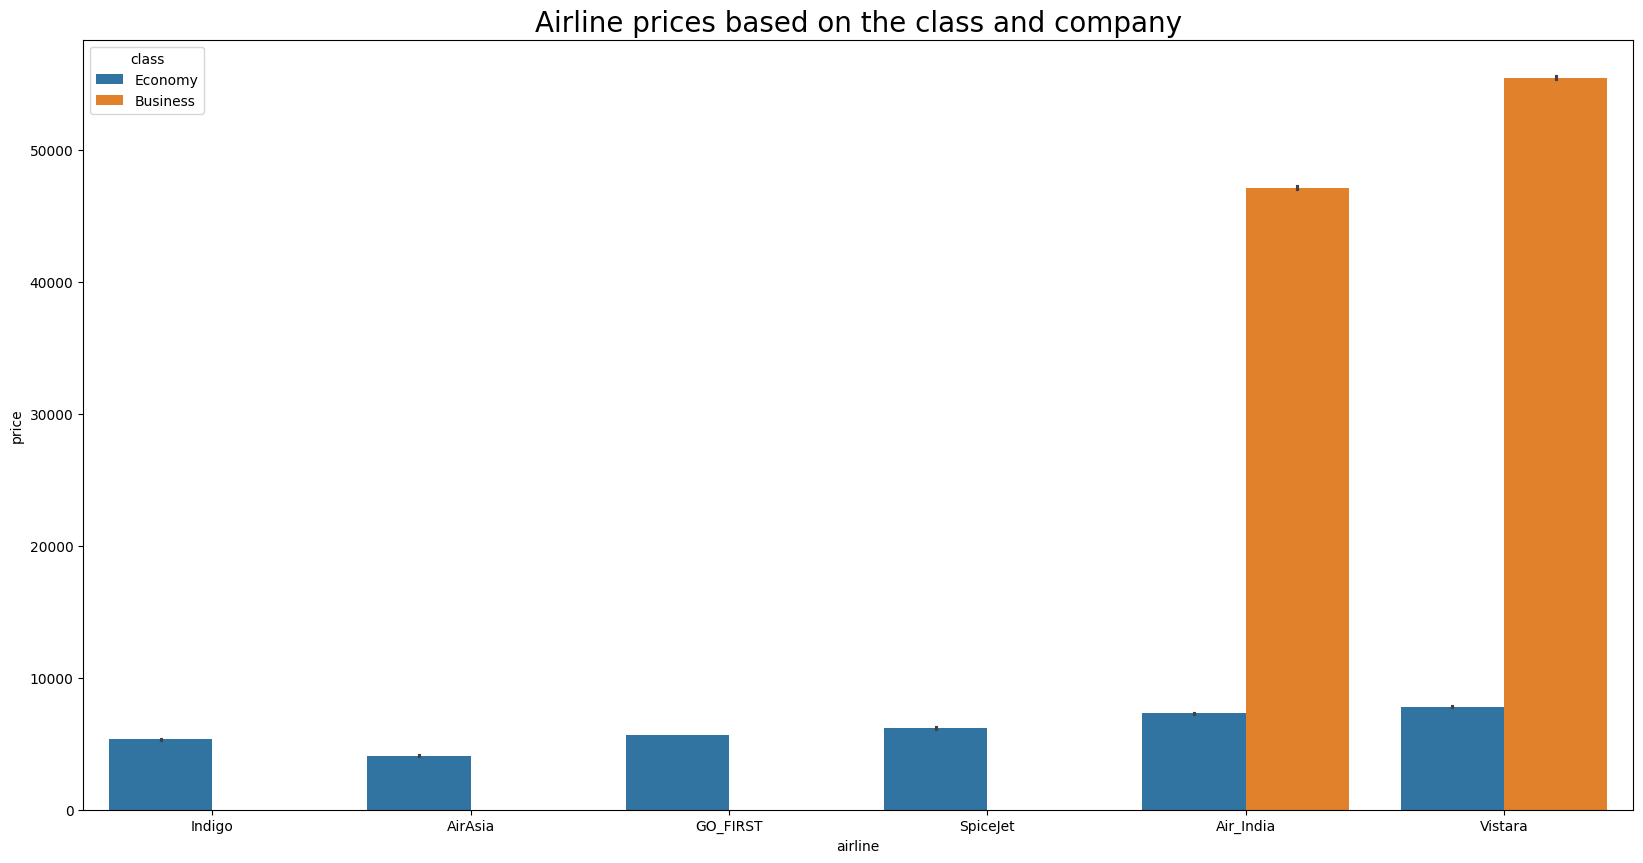

In [30]:
plt.figure(figsize=(20, 10))
sns.barplot(x='airline',y='price',hue="class",data=df.sort_values("price")).set_title('Airline prices based on the class and company',fontsize=20)

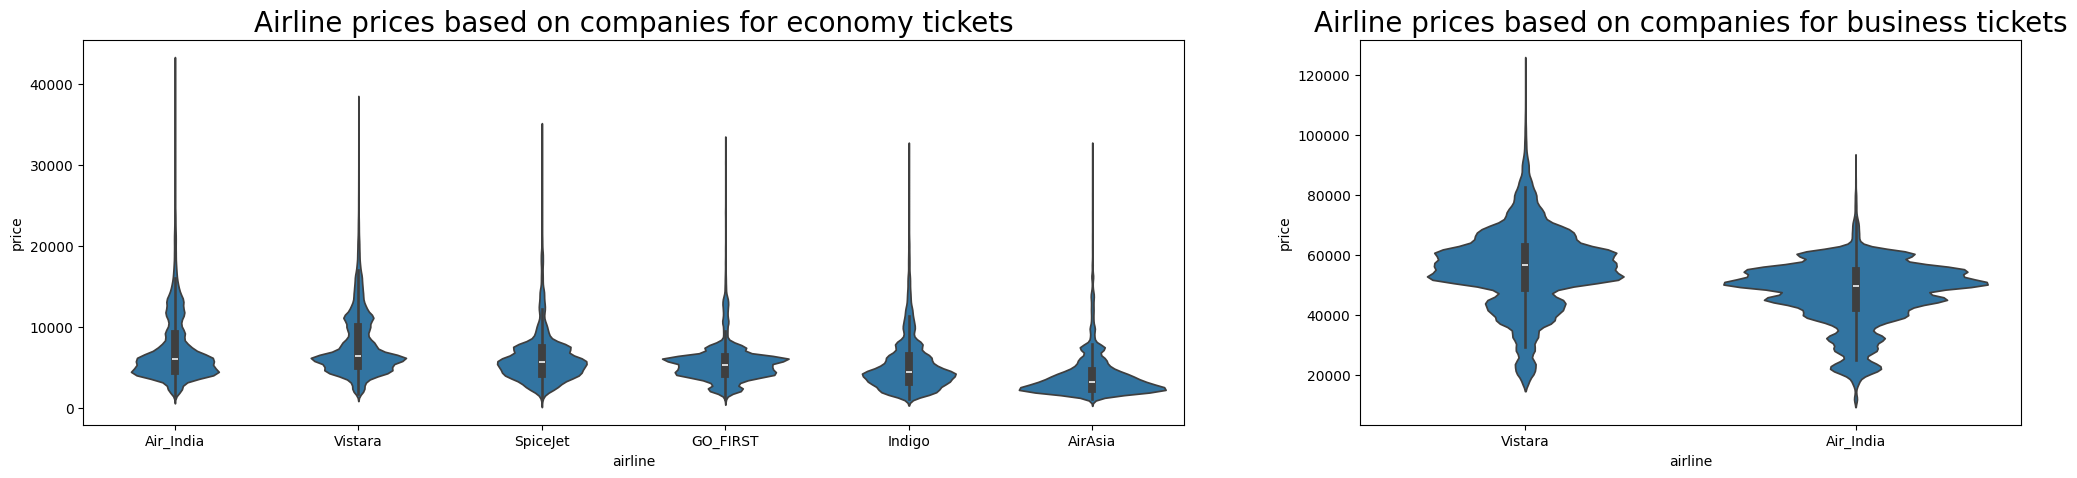

In [32]:
fig, axs = plt.subplots(1, 2, gridspec_kw={'width_ratios': [5, 3]}, figsize=(25, 5))

# Violin plot for Economy class
sns.violinplot(
    y="price", 
    x="airline", 
    data=df.loc[df["class"] == 'Economy'].sort_values("price", ascending=False), 
    ax=axs[0]
)
axs[0].set_title("Airline prices based on companies for economy tickets", fontsize=20)

# Violin plot for Business class
sns.violinplot(
    y="price", 
    x="airline", 
    data=df.loc[df["class"] == 'Business'].sort_values("price", ascending=False), 
    ax=axs[1]
)
axs[1].set_title("Airline prices based on companies for business tickets", fontsize=20)

plt.show()

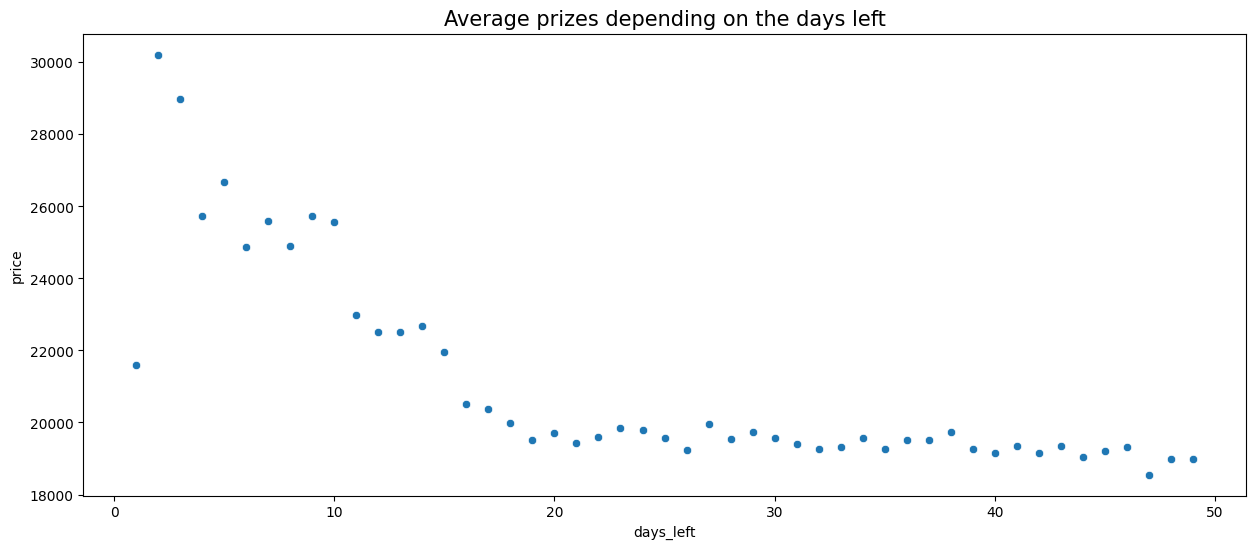

In [33]:
df_temp = df.groupby(['days_left'])['price'].mean().reset_index()

plt.figure(figsize=(15,6))
ax = sns.scatterplot(x="days_left", y="price", data=df_temp).set_title("Average prizes depending on the days left",fontsize=15)

Text(0.5, 1.0, 'Airline prices based on the arrival time')

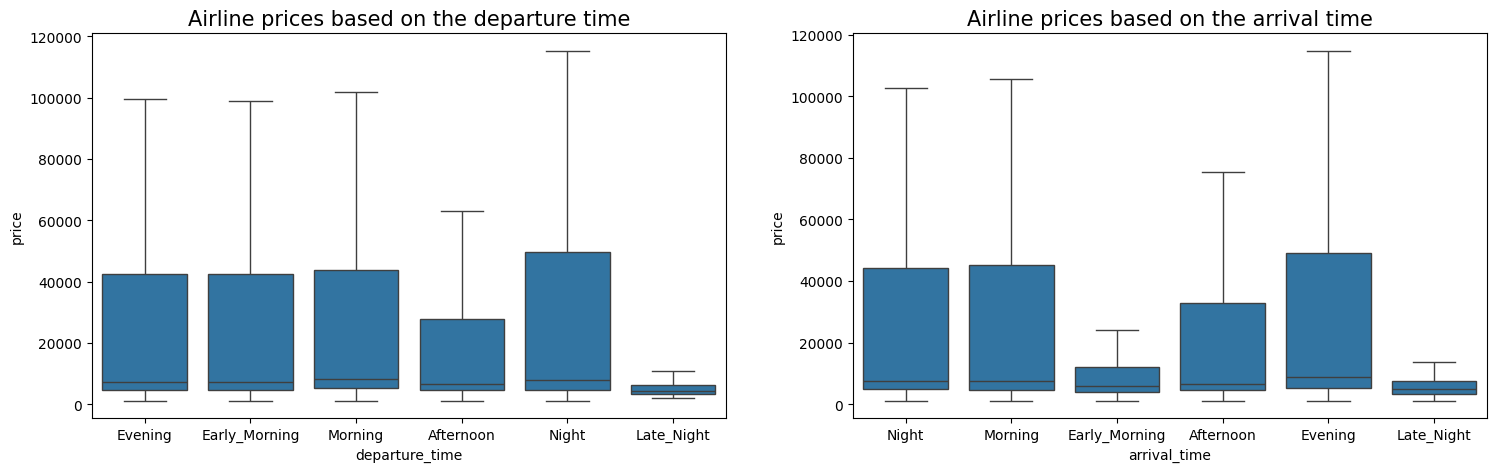

In [34]:
plt.figure(figsize = (18,5))
plt.subplot(1,2,1)
sns.boxplot(data=df, y="price", x="departure_time",showfliers=False).set_title("Airline prices based on the departure time",fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(data=df, y="price", x="arrival_time",showfliers=False).set_title("Airline prices based on the arrival time",fontsize=15)

Text(0.5, 0.98, 'Airline prices based on the source and destination cities')

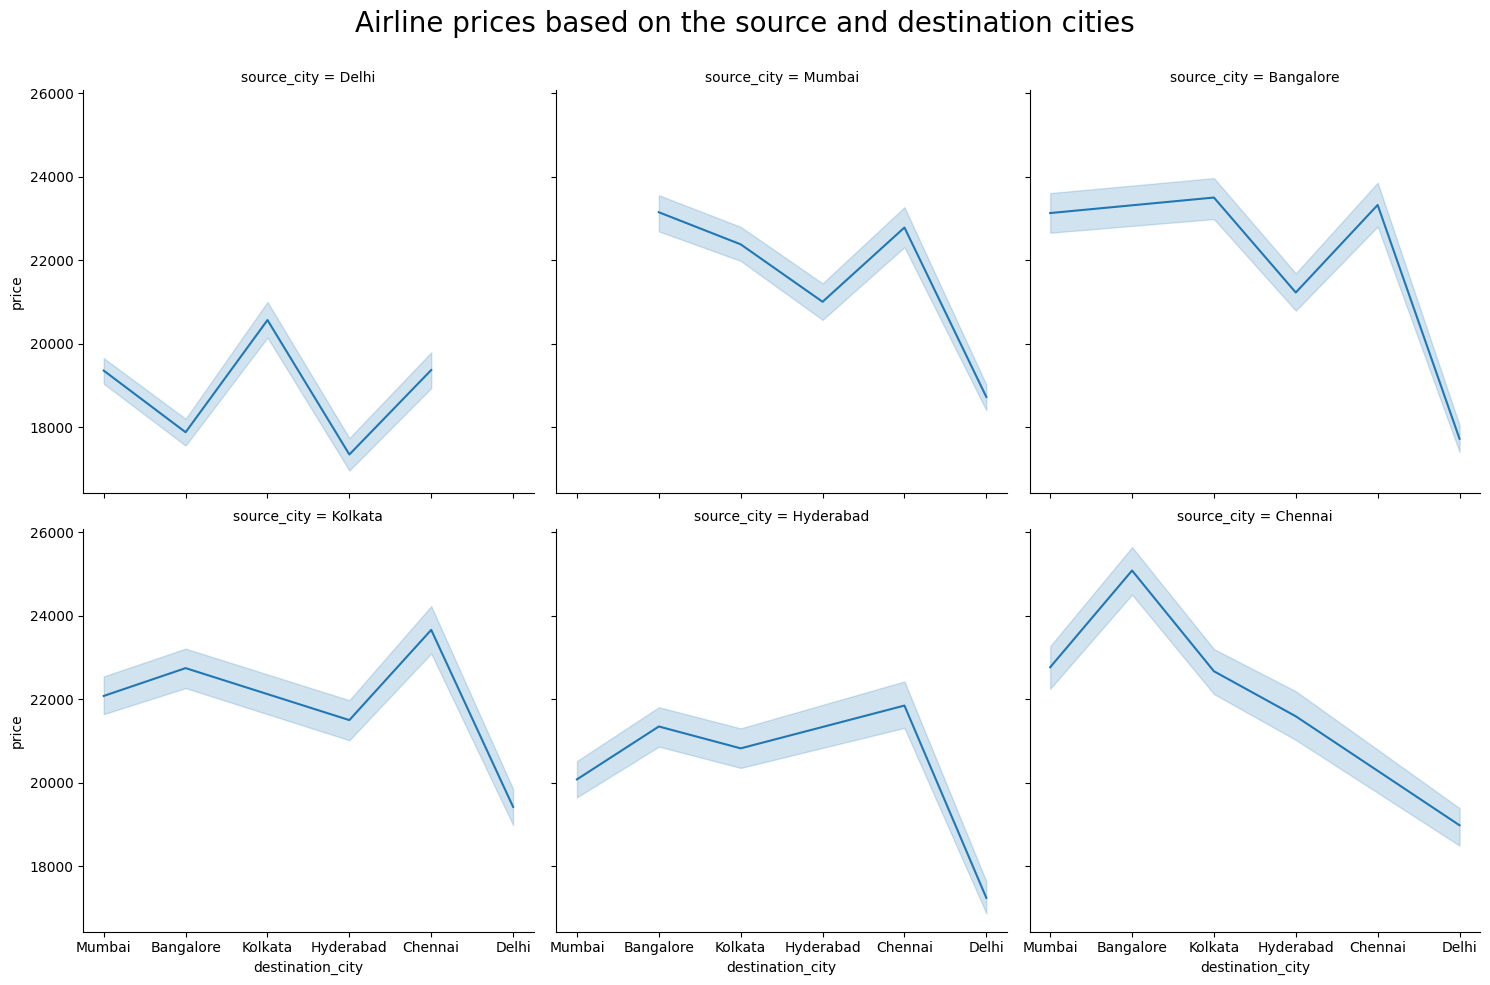

In [38]:
ax = sns.relplot(col="source_city", y="price", kind="line",x='destination_city', data=df, col_wrap=3)
ax.figure.subplots_adjust(top=0.9) # adjust the Figure in rp
ax.figure.suptitle('Airline prices based on the source and destination cities',fontsize=20)